# Ch2: 2.2.9 Factor Analysis
Adopted From https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The dataset is collected from interviewing several candidates and scored each one out of 10 for 32 variable. The various variables/features of the interviewee are distant, relaxed, careless, talkative, lazy, etc.

## Variables such as relaxed, careless, and lazy features are correlated because these persons won’t be successful. Since these variables are correlated we can try to form a factor called ‘unsuccessful behaviors’ which will explain the common variance i.e. variance due to correlation among these features.

In [4]:
with open('data/Standford.txt','r') as file:
    header = file.readline()
    data=[]
    for row in file.readlines()[1:]:
        row = row.split()[1:]
        data.append(row)
    data = np.array(data,dtype='int')
dataset = pd.DataFrame(data,columns=np.array(header.split(),dtype=object))
dataset.head()

,"""distant""","""talkatv""","""carelss""","""hardwrk""","""anxious""","""agreebl""","""tense""","""kind""","""opposng""","""relaxed""",...,"""lazy""","""coopera""","""quiet""","""organiz""","""criticl""","""lax""","""laidbck""","""withdrw""","""givinup""","""easygon"""
0,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
1,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
2,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
3,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5
4,7,6,7,6,7,8,7,8,5,5,...,5,7,8,6,6,4,4,6,4,7


In [5]:
np.array(list(dataset.columns),dtype=object)

array(['"distant"', '"talkatv"', '"carelss"', '"hardwrk"', '"anxious"',
       '"agreebl"', '"tense"', '"kind"', '"opposng"', '"relaxed"',
       '"disorgn"', '"outgoin"', '"approvn"', '"shy"', '"discipl"',
       '"harsh"', '"persevr"', '"friendl"', '"worryin"', '"respnsi"',
       '"contrar"', '"sociabl"', '"lazy"', '"coopera"', '"quiet"',
       '"organiz"', '"criticl"', '"lax"', '"laidbck"', '"withdrw"',
       '"givinup"', '"easygon"'], dtype=object)

In [6]:
dataset.isnull().sum()

"distant"    0
"talkatv"    0
"carelss"    0
"hardwrk"    0
"anxious"    0
"agreebl"    0
"tense"      0
"kind"       0
"opposng"    0
"relaxed"    0
"disorgn"    0
"outgoin"    0
"approvn"    0
"shy"        0
"discipl"    0
"harsh"      0
"persevr"    0
"friendl"    0
"worryin"    0
"respnsi"    0
"contrar"    0
"sociabl"    0
"lazy"       0
"coopera"    0
"quiet"      0
"organiz"    0
"criticl"    0
"lax"        0
"laidbck"    0
"withdrw"    0
"givinup"    0
"easygon"    0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
dataframe = scaler.fit_transform(dataset)
dataframe = pd.DataFrame(data=dataframe,columns=dataset.columns)
dataframe.head(10)

,"""distant""","""talkatv""","""carelss""","""hardwrk""","""anxious""","""agreebl""","""tense""","""kind""","""opposng""","""relaxed""",...,"""lazy""","""coopera""","""quiet""","""organiz""","""criticl""","""lax""","""laidbck""","""withdrw""","""givinup""","""easygon"""
0,-0.488390,1.265587,-0.788318,0.046253,-0.064666,1.005322,-0.323008,0.826566,0.717681,0.901710,...,-1.149738,0.264088,0.760729,-0.081040,-0.671279,-0.648872,0.985611,-0.989317,-0.430324,0.589672
1,1.187091,0.072391,-0.788318,-1.427667,-2.196418,1.005322,-1.373331,1.623135,-1.160338,1.492145,...,0.441695,1.105648,1.298641,-1.100441,-0.098294,0.553302,0.985611,1.273331,-0.430324,1.216035
2,-0.488390,0.668989,1.428247,0.046253,1.534148,1.005322,-1.373331,0.826566,-0.534332,0.901710,...,-0.619260,1.105648,-0.315095,0.428660,0.474690,1.154389,0.426083,0.142007,0.216515,0.589672
3,1.745584,-1.717404,-0.234177,-1.427667,1.534148,-0.455298,1.252478,-3.952850,-0.534332,-1.460029,...,0.972172,-0.577472,1.298641,-0.590741,-0.098294,-0.648872,-1.252498,1.838993,1.510194,-0.663054
4,1.745584,0.072391,1.982388,-0.690707,1.001210,1.005322,1.252478,0.826566,0.717681,-0.279160,...,0.441695,0.264088,1.836553,-0.081040,0.474690,-0.047785,-0.692971,1.273331,0.863355,0.589672
5,-0.488390,0.072391,2.536529,-0.690707,0.468272,0.275012,-0.848169,-1.563142,-0.534332,0.901710,...,0.972172,-0.577472,-0.315095,-1.100441,0.474690,2.957651,2.104665,-0.989317,0.216515,1.216035
6,1.745584,0.072391,-0.788318,1.520172,1.001210,1.005322,0.727316,0.029996,-1.160338,-0.869595,...,-0.088783,1.105648,0.760729,-0.081040,-0.671279,-0.648872,-1.812025,0.707669,2.157034,-0.036691
7,-1.046883,0.072391,-0.788318,0.783212,-1.663480,0.275012,-0.323008,0.029996,0.091675,1.492145,...,-0.619260,1.105648,0.222817,0.428660,1.047675,-0.648872,0.426083,-0.423655,-1.077164,0.589672
8,0.070104,0.668989,-0.234177,-0.690707,-1.130542,0.275012,-0.848169,0.029996,0.717681,0.311275,...,-0.619260,0.264088,0.222817,-0.081040,-0.098294,-0.648872,-0.692971,0.142007,-0.430324,-0.663054
9,-0.488390,-0.524208,-0.788318,0.783212,-1.130542,0.275012,-0.848169,-1.563142,0.091675,-0.279160,...,-0.088783,0.264088,1.298641,0.938360,1.047675,0.553302,-0.133444,1.273331,-0.430324,0.589672


In [10]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=c63c86b74dc65d1ecd690e279b2bd59718760c95de2efd87588043d74907af37
  Stored in directory: c:\users\dell precision\appdata\local\pip\cache\wheels\c4\c5\20\f59c259c406007a587ff4a0d0e6212ae14f9558a0124463545
Successfully built factor-analyzer


## Bartlett’s test checks whether the correlation is present in the given data. It tests the null hypothesis (H0) that the correlation matrix is an Identical matrix. The identical matrix consists of all the diagonal elements as 1. So, the null hypothesis assumes that no correlation is present among the variables.

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

chi2,p = calculate_bartlett_sphericity(dataframe)
print("Bartlett Sphericity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphericity Test
Chi squared value :  4054.1903704108126
p value :  0.0


## KAISER-MEYER-OLKIN (KMO) TEST measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. KMO score is always between 0 to 1 and values more than 0.6 are much appreciated. 

In [13]:
kmo_all,kmo_model = calculate_kmo(dataset)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.8412492848324344


## DETERMINING THE NUMBER OF FACTORS using a scree plot of Eigenvalues against the number of factors, and choosing the number of factors whose eigenvalues are greater than 1.

But why should we choose the factors whose eigenvalues are greater than 1? The answer is very simple. In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance than a single observed variable. So, the optimal number of factors is 6.

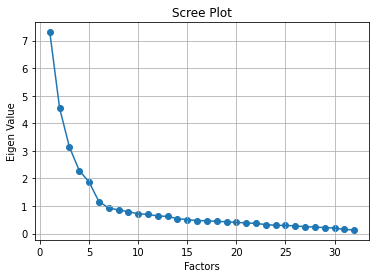

In [15]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])
fa.fit(dataframe)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

## INTERPRETING THE FACTORS  by making use of loadings, variance, and commonalities. Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable.

In [16]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(dataset)
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues']))

    EigenValues
0      7.302799
1      4.548282
2      3.139369
3      2.287701
4      1.872118
5      1.162963
6      0.929010
7      0.858765
8      0.797746
9      0.714349
10     0.698059
11     0.639627
12     0.624140
13     0.542297
14     0.507577
15     0.473236
16     0.466436
17     0.444508
18     0.429618
19     0.404030
20     0.389440
21     0.367948
22     0.328853
23     0.300986
24     0.296353
25     0.279923
26     0.252422
27     0.236597
28     0.219695
29     0.201011
30     0.149950
31     0.134192


In [17]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.loadings_,index=dataframe.columns))

                  0         1         2         3         4         5
"distant"  0.609023 -0.006397  0.073777 -0.094768  0.281190  0.137020
"talkatv" -0.759229  0.063613 -0.034403  0.096989  0.146306  0.132109
"carelss"  0.056199 -0.306297  0.070390 -0.035685  0.224019  0.630871
"hardwrk" -0.170320  0.680222  0.142007  0.121206  0.060352 -0.166850
"anxious"  0.170813 -0.022046  0.694277  0.153762  0.208925  0.114961
"agreebl" -0.022760  0.040577 -0.063251  0.631000 -0.193389  0.096209
"tense"    0.163876  0.025240  0.773851  0.013027  0.259396  0.061163
"kind"    -0.120286  0.223273  0.035653  0.606016 -0.177133 -0.220756
"opposng" -0.015363 -0.079381  0.089695 -0.134643  0.644569  0.068352
"relaxed" -0.023995 -0.125786 -0.691357  0.339581 -0.066510  0.045164
"disorgn"  0.017247 -0.368660 -0.023374  0.014760  0.074966  0.774337
"outgoin" -0.829508  0.081210 -0.050024  0.244690  0.013635 -0.020429
"approvn" -0.270433  0.134104 -0.122642  0.495630 -0.127813 -0.032620
"shy"      0.707028 

## For example, in Factor 0, we can see that the features ‘distant’ and ‘shy’ talkative have high loadings than other variables. From this, we can see that Factor 0, explains the common variance in people who are reserved i.e. the variance among the people who are distant and shy.

## The amount of variance explained by each factor can be found out using the ‘get_factor_variance’ function.

In [18]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          4.563760  3.254322  2.985727  2.448254  2.339837  2.108028
Proportional Var  0.142617  0.101698  0.093304  0.076508  0.073120  0.065876
Cumulative Var    0.142617  0.244315  0.337619  0.414127  0.487247  0.553123



## Communality is the proportion of each variable’s variance that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.

In [19]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

           Communalities
"distant"       0.483216
"talkatv"       0.629924
"carelss"       0.551387
"hardwrk"       0.558049
"anxious"       0.592192
"agreebl"       0.450981
"tense"         0.697535
"kind"          0.512955
"opposng"       0.452852
"relaxed"       0.616152
"disorgn"       0.742189
"outgoin"       0.757657
"approvn"       0.369208
"shy"           0.581007
"discipl"       0.501919
"harsh"         0.485855
"persevr"       0.460671
"friendl"       0.601197
"worryin"       0.601062
"respnsi"       0.576687
"contrar"       0.591444
"sociabl"       0.635075
"lazy"          0.567475
"coopera"       0.452638
"quiet"         0.699853
"organiz"       0.735254
"criticl"       0.428041
"lax"           0.330854
"laidbck"       0.499435
"withdrw"       0.662626
"givinup"       0.441092
"easygon"       0.433444


In [20]:
print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

           Communalities
"distant"       0.483216
"talkatv"       0.629924
"carelss"       0.551387
"hardwrk"       0.558049
"anxious"       0.592192
"agreebl"       0.450981
"tense"         0.697535
"kind"          0.512955
"opposng"       0.452852
"relaxed"       0.616152
"disorgn"       0.742189
"outgoin"       0.757657
"approvn"       0.369208
"shy"           0.581007
"discipl"       0.501919
"harsh"         0.485855
"persevr"       0.460671
"friendl"       0.601197
"worryin"       0.601062
"respnsi"       0.576687
"contrar"       0.591444
"sociabl"       0.635075
"lazy"          0.567475
"coopera"       0.452638
"quiet"         0.699853
"organiz"       0.735254
"criticl"       0.428041
"lax"           0.330854
"laidbck"       0.499435
"withdrw"       0.662626
"givinup"       0.441092
"easygon"       0.433444


## The proportion of each variable’s variance that is explained by the factors can be inferred from the above. For example, we could consider the variable ‘talkatv’ about 62.9% of its variance is explained by all the factors together.

## Using the SKlearn FA imeplementation on the same dataset and comparing with Probabilistic PCA and using cross validation scores to identify the best number of factors. Adopted from https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html?highlight=factor+analysis. 

Homoscedastic Noise
best n_components by PCA CV = 5
best n_components by FactorAnalysis CV = 5
best n_components by PCA MLE = 5
Heteroscedastic Noise
best n_components by PCA CV = 5
best n_components by FactorAnalysis CV = 5
best n_components by PCA MLE = 8


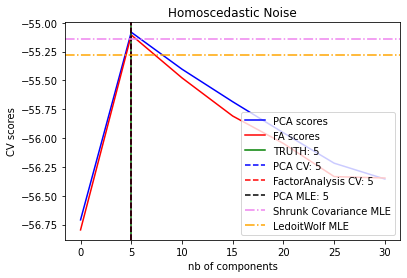

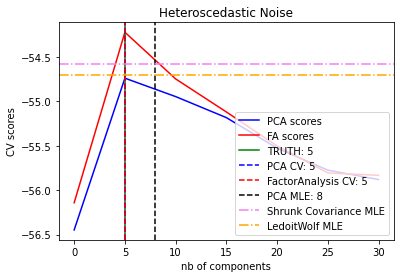

In [27]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

n_samples, n_features = dataframe.shape
rank = 5
sigma = 1.0
rng = np.random.RandomState(42)

# Adding homoscedastic noise
X_homo = dataframe + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.0
X_hetero = dataframe + rng.randn(n_samples, n_features) * sigmas

n_components = np.arange(0, n_features, 5)  # options for n_components
def compute_scores(X):
    pca = PCA(svd_solver="full")
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X)))
        fa_scores.append(np.mean(cross_val_score(fa, X)))

    return pca_scores, fa_scores


def shrunk_cov_score(X):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {"shrinkage": shrinkages})
    return np.mean(cross_val_score(cv.fit(X).best_estimator_, X))


def lw_score(X):
    return np.mean(cross_val_score(LedoitWolf(), X))


for X, title in [(X_homo, "Homoscedastic Noise"), (X_hetero, "Heteroscedastic Noise")]:
    pca_scores, fa_scores = compute_scores(X)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]

    pca = PCA(svd_solver="full", n_components="mle")
    pca.fit(X)
    n_components_pca_mle = pca.n_components_
    
    print (title)
    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure()
    plt.plot(n_components, pca_scores, "b", label="PCA scores")
    plt.plot(n_components, fa_scores, "r", label="FA scores")
    plt.axvline(rank, color="g", label="TRUTH: %d" % rank, linestyle="-")
    plt.axvline(
        n_components_pca,
        color="b",
        label="PCA CV: %d" % n_components_pca,
        linestyle="--",
    )
    plt.axvline(
        n_components_fa,
        color="r",
        label="FactorAnalysis CV: %d" % n_components_fa,
        linestyle="--",
    )
    plt.axvline(
        n_components_pca_mle,
        color="k",
        label="PCA MLE: %d" % n_components_pca_mle,
        linestyle="--",
    )

    # compare with other covariance estimators
    plt.axhline(
        shrunk_cov_score(X),
        color="violet",
        label="Shrunk Covariance MLE",
        linestyle="-.",
    )
    plt.axhline(
        lw_score(X),
        color="orange",
        label="LedoitWolf MLE" % n_components_pca_mle,
        linestyle="-.",
    )

    plt.xlabel("nb of components")
    plt.ylabel("CV scores")
    plt.legend(loc="lower right")
    plt.title(title)

plt.show()